# Bayesian Analaysis - Coin Toss

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

from scipy import stats
from scipy.stats import gaussian_kde
from scipy.stats import binom, gamma, beta, poisson

### 1. Binomial likelihood with a beta (1, 1) prior

In [2]:
alpha = 1
beta = 1

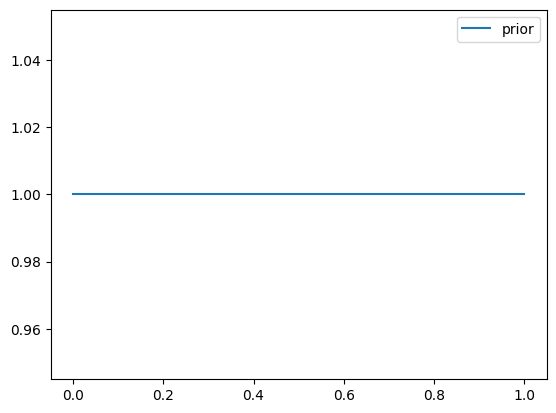

In [3]:
x = np.linspace(start = 0, stop = 1, num = 100)

plt.plot(x, stats.beta.pdf(x, alpha, beta), label = 'prior')
plt.legend(loc = 'best')

In [4]:
n = 10
x = 2
alpha = 1
beta = 1
draws = 1000

with pm.Model() as model:
    p = pm.Beta('p', alpha = alpha, beta = beta)
    y = pm.Binomial('y', n = n, p = p, observed = x)
    trace = pm.sample(draws = draws, cores = 4)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


In [5]:
with model:
    display(az.summary(trace))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.251,0.117,0.05,0.464,0.003,0.002,1871.0,2298.0,1.0


In [6]:
trace.posterior['p'][0].values[0:20]

array([0.08459097, 0.2206437 , 0.18919937, 0.13242306, 0.17998863,
       0.19661067, 0.29586842, 0.23387346, 0.23387346, 0.23310507,
       0.26330302, 0.26330302, 0.26330302, 0.26330302, 0.21858479,
       0.42241609, 0.18641938, 0.10467138, 0.29490838, 0.29490838])

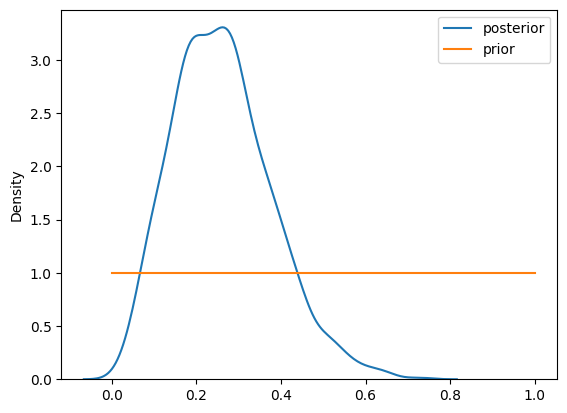

In [7]:
sns.kdeplot(trace.posterior['p'][0].values, label = 'posterior')
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label = 'prior')
plt.legend(loc = 'best')

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


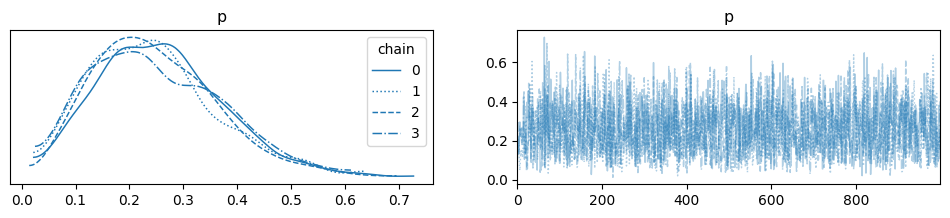

In [8]:
with model:
    az.plot_trace(trace, legend = True)

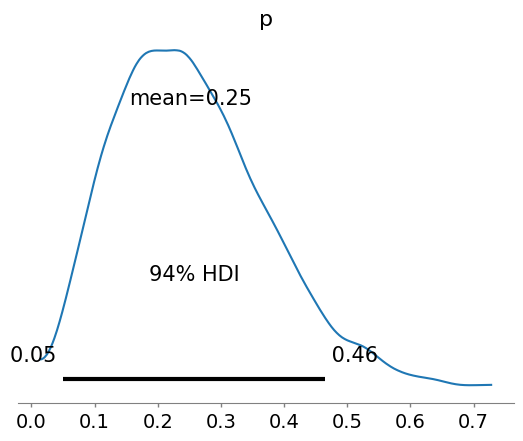

In [9]:
with model:
    az.plot_posterior(trace)

### 2. Binomial likelihood with a Beta(2, 1) prior

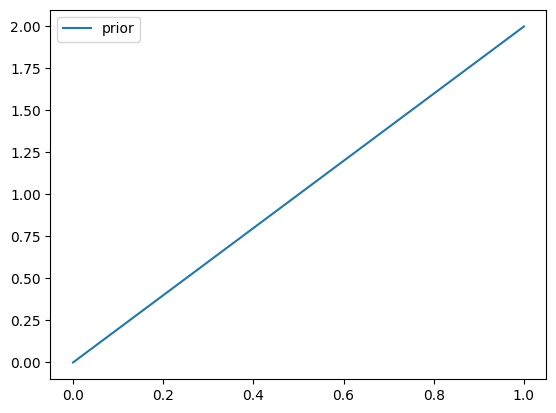

In [10]:
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, 2, 1), label = 'prior')
plt.legend(loc = 'best')

In [11]:
n = 10
x = 2
alpha = 2
beta = 1
draws = 1000

with pm.Model() as model:
    p = pm.Beta('p', alpha = alpha, beta = beta)
    y = pm.Binomial('y', n = n, p = p, observed = x)
    trace = pm.sample(draws = draws, cores = 4)

In [12]:
with model:
    display(az.summary(trace))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.308,0.126,0.068,0.528,0.003,0.002,1777.0,2254.0,1.0


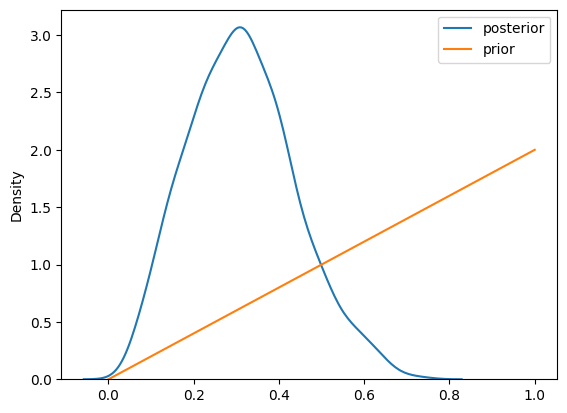

In [13]:
sns.kdeplot(trace.posterior['p'][0].values, label = 'posterior')
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label = 'prior')
plt.legend(loc = 'best')

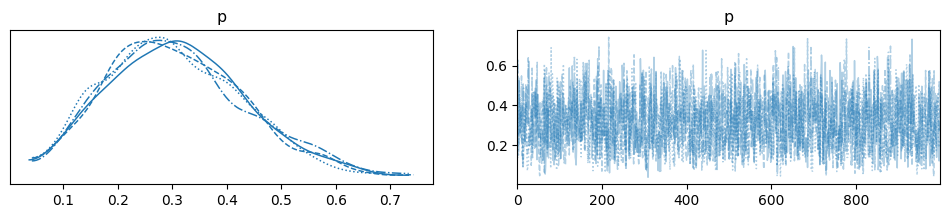

In [14]:
with model:
    az.plot_trace(trace)

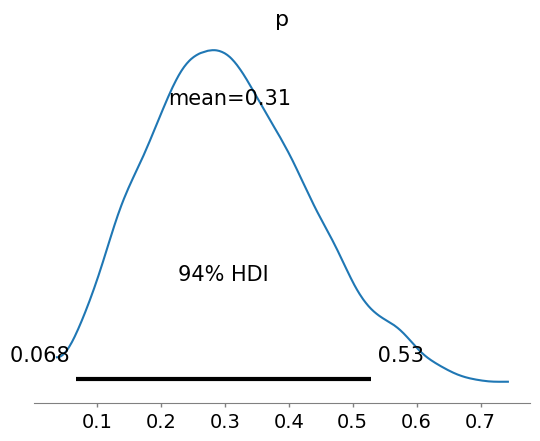

In [15]:
with model:
    az.plot_posterior(trace)

### 3. Binomial likelihood with a Beta(30, 30) prior

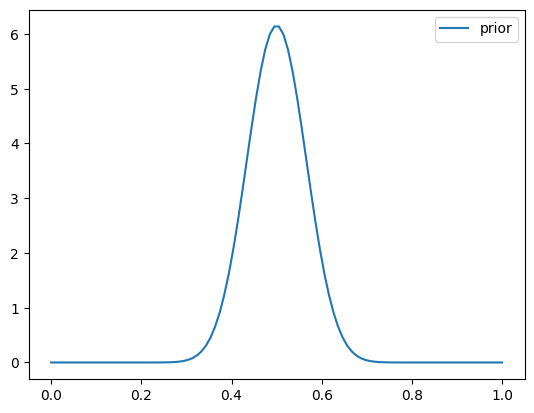

In [16]:
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, 30, 30), label = 'prior')
plt.legend(loc = 'best')

In [17]:
n = 10
x = 2
alpha = 30
beta = 30
draws = 1000

with pm.Model() as model:
    p = pm.Beta('p', alpha = alpha, beta = beta)
    y = pm.Binomial('y', n = n, p = p, observed = x)
    trace = pm.sample(draws = draws, cores = 4)

In [18]:
with model:
    display(az.summary(trace))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.459,0.061,0.344,0.573,0.001,0.001,1910.0,2107.0,1.0


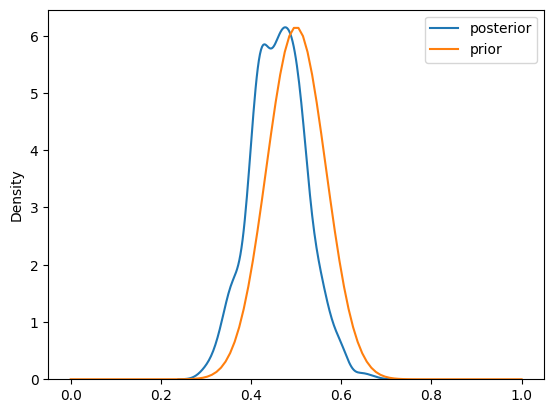

In [19]:
sns.kdeplot(trace.posterior['p'][0].values, label = 'posterior')
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label = 'prior')
plt.legend(loc = 'best')

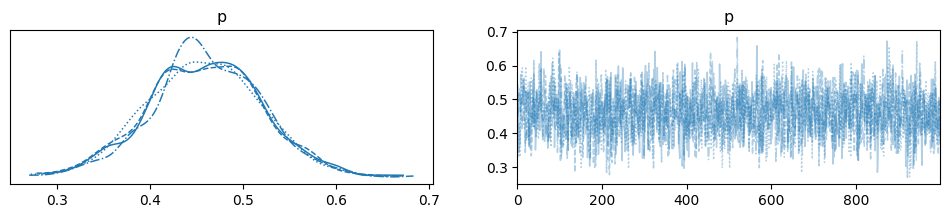

In [20]:
with model:
    az.plot_trace(trace)

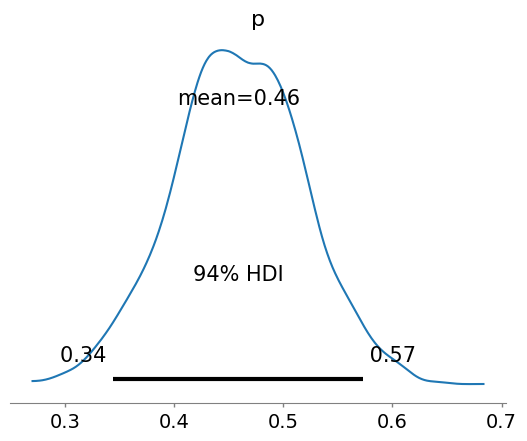

In [21]:
with model:
  az.plot_posterior(trace)

### 4. Binomial likelihood with a Beta(30, 30) prior with increased number of trials

In [22]:
n = 100
x = 20
draws = 1000
alpha=30
beta=30

with pm.Model() as model:
    p = pm.Beta('p', alpha = alpha, beta = beta)
    y = pm.Binomial('y', n = n, p = p, observed = x)
    trace = pm.sample(draws = draws, cores = 4)

In [23]:
with model:
    display(az.summary(trace))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.312,0.036,0.241,0.377,0.001,0.001,1608.0,2668.0,1.0


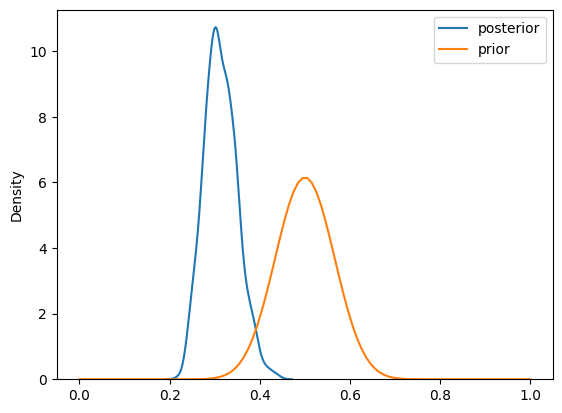

In [24]:
sns.kdeplot(trace.posterior['p'][0].values, label = 'posterior')
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label = 'prior')
plt.legend(loc = 'best')

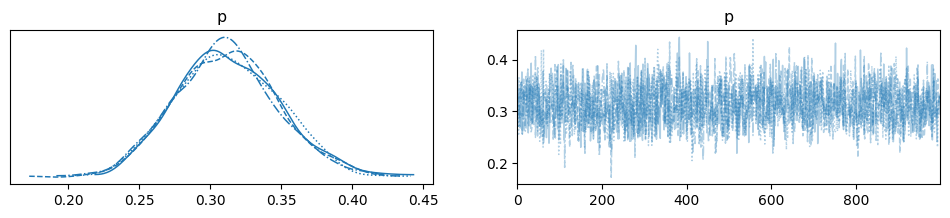

In [25]:
with model:
    az.plot_trace(trace)

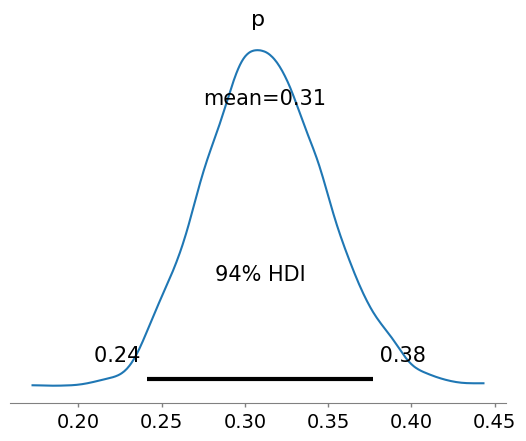

In [26]:
with model:
    az.plot_posterior(trace)